In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib notebook
%matplotlib inline
pd.options.display.max_columns = None

In [2]:
!tree ../data/processed/

../data/processed/
└── valeo_processed.csv

0 directories, 1 file


In [4]:
# upload data

processed_path = '../data/processed/'
df = pd.read_csv(processed_path+'valeo_processed.csv')
df.head()

,date,product_code,V_1_angle_value,SnapRingPeakForce_value,V_2_angle_value,Rodage_I_mesure_value,SnapRingFinalStroke_value,Vissage_M8_torque_value,Capuchon_insertion_mesure,Rodage_U_mesure_value,V_1_torque_value,StartLinePeakForce_value,Vissage_M8_angle_value,SnapRingMidPointForce_val,V_2_torque_value,Results_Global_v
0,2019-04-20,1120,141.1,171.27,154.0,114.75,12.09,12.15,NaN,11.97,6.65,24.70,38.3,106.41,6.61,0
1,2019-04-20,1123,165.1,176.88,149.1,118.21,12.08,12.25,NaN,11.97,6.60,25.83,16.9,97.73,6.61,0
2,2019-04-20,1124,186.6,169.28,133.1,121.10,12.10,12.12,NaN,11.97,6.61,24.48,25.0,101.98,6.61,0
3,2019-04-20,1125,153.1,175.58,176.7,114.19,12.08,12.21,NaN,11.97,6.60,25.13,16.3,96.26,6.61,0
4,2019-04-20,1126,147.6,167.72,131.6,116.65,12.09,12.17,NaN,11.97,6.63,21.41,35.3,92.31,6.61,0


In [5]:
df.isna().sum()

date                             0
product_code                     0
V_1_angle_value                  0
SnapRingPeakForce_value          0
V_2_angle_value                  0
Rodage_I_mesure_value            0
SnapRingFinalStroke_value        0
Vissage_M8_torque_value          0
Capuchon_insertion_mesure    18627
Rodage_U_mesure_value            0
V_1_torque_value                 0
StartLinePeakForce_value         0
Vissage_M8_angle_value           0
SnapRingMidPointForce_val        0
V_2_torque_value                 0
Results_Global_v                 0
dtype: int64

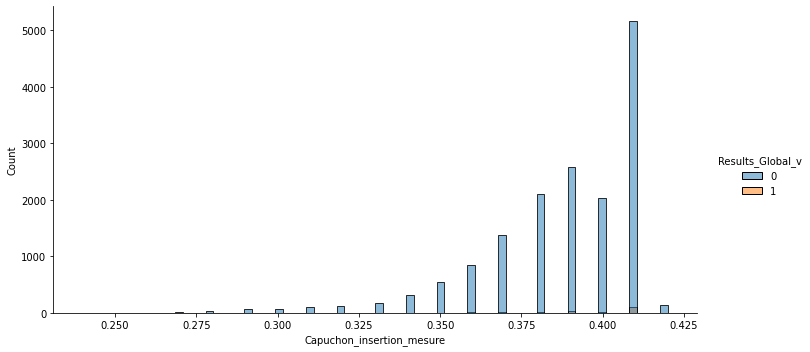

In [41]:
sns.displot(df, x='Capuchon_insertion_mesure', hue='Results_Global_v', height=5, aspect=2)

In [87]:
df_null = df[df['Capuchon_insertion_mesure'].isnull()]
df_null['Results_Global_v'].value_counts()

0    18517
1      110
Name: Results_Global_v, dtype: int64

In [83]:
df_not_null = df[df['Capuchon_insertion_mesure'] != df['Capuchon_insertion_mesure'].isnull()]
df_not_null['Results_Global_v'].value_counts()

0    34210
1      305
Name: Results_Global_v, dtype: int64

In [89]:
df.dropna(axis=1, inplace=True)

In [94]:
df.columns

Index(['date', 'product_code', 'V_1_angle_value', 'SnapRingPeakForce_value',
       'V_2_angle_value', 'Rodage_I_mesure_value', 'SnapRingFinalStroke_value',
       'Vissage_M8_torque_value', 'Rodage_U_mesure_value', 'V_1_torque_value',
       'StartLinePeakForce_value', 'Vissage_M8_angle_value',
       'SnapRingMidPointForce_val', 'V_2_torque_value', 'Results_Global_v'],
      dtype='object')

In [97]:
X = df.iloc[:, 2:-1]
y = df['Results_Global_v']

In [118]:
# PCA
from sklearn.decomposition import PCA

# Let's using PCA from sklearn to go from 3 to 2 dimensions
pca = PCA(n_components=5) 

# if n_components >= 1, then n_components will be the number of resulting dimensions

# first we perform mean normalization
X_centered = X - X.mean(axis=0)

pca.fit(X_centered)
X_pca = pca.transform(X_centered)

pca.explained_variance_ratio_
# np.sum(pca.explained_variance_ratio_)

array([0.396497  , 0.26941041, 0.19165859, 0.06361637, 0.05620277])

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [130]:
y_train.value_counts()

0    27368
1      244
Name: Results_Global_v, dtype: int64

In [131]:
y_test.value_counts()

0    6842
1      61
Name: Results_Global_v, dtype: int64

In [121]:
X_train.shape,  X_test.shape,  y_train.shape,  y_test.shape

((27612, 12), (6903, 12), (27612,), (6903,))

In [125]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.991163262349703